In [13]:
import pandas as pd 
user_data = pd.read_csv('../user_data.csv')

In [14]:
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,16454,1,2,64,5.9,5.9,1,0.0,1,0,0.0
1,14576,1,12,372,35.4,35.4,1,0.0,1,0,0.0
2,16148,1,72,296,76.3,76.3,1,0.0,1,0,0.0
3,13841,1,100,252,85.0,85.0,1,0.0,1,0,0.0
4,13302,1,5,155,63.8,63.8,1,0.0,1,0,0.0


In [15]:
from scipy import stats
import numpy as np

In [16]:
# CustomerID 제외, 정규화
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,0.439709,0.238911,0.274439,0.228516,0.805015,0.704913,0.295648,0.396911,0.271913,0.296906
1,0.439709,0.236769,2.776234,0.224946,0.729593,0.704913,0.295648,0.396911,0.271913,0.296906
2,0.439709,0.223918,2.023470,0.219998,0.625024,0.704913,0.295648,0.396911,0.271913,0.296906
3,0.439709,0.217920,1.587660,0.218945,0.602781,0.704913,0.295648,0.396911,0.271913,0.296906
4,0.439709,0.238269,0.626896,0.221510,0.656983,0.704913,0.295648,0.396911,0.271913,0.296906
...,...,...,...,...,...,...,...,...,...,...
4357,4.405139,12.188656,0.878630,5.924646,2.069725,9.639880,0.277108,6.783151,0.146459,0.296906
4358,1.322054,3.259803,0.868726,6.214540,7.189492,12.381309,0.293882,21.918669,0.271913,0.296906
4359,18.058801,4.604325,0.898440,4.593640,0.216977,14.864996,0.292116,33.768619,18.275929,0.094404
4360,23.344089,4.797746,0.908345,3.378712,0.468811,19.984673,0.289468,19.049273,5.724757,0.195655


In [17]:
# 임계값 설정
threshold = 3

# Z-Score 기준으로 이상치를 찾아내고
# outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,outlier
0,16454,1,2,64,5.9,5.9,1,0.0,1,0,0.0,0
1,14576,1,12,372,35.4,35.4,1,0.0,1,0,0.0,0
2,16148,1,72,296,76.3,76.3,1,0.0,1,0,0.0,0
3,13841,1,100,252,85.0,85.0,1,0.0,1,0,0.0,0
4,13302,1,5,155,63.8,63.8,1,0.0,1,0,0.0,0


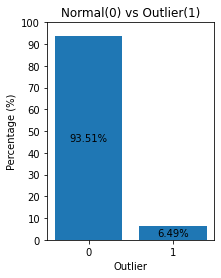

In [10]:
import matplotlib.pyplot as plt

# 이상치 여부에 따른 확률 계산
# value_counts(): 열의 고윳값 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환한다.
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3, 4))

# bar chart 시각화 - x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)')    # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)')            # y축 범례
plt.xlabel('Outlier')                   # x축 범례
plt.show()                              # 출력

In [18]:
# 정상 데이터만 필터링하여 이상치 제거
user_data = user_data[user_data['outlier'] == 0]

# outlier 컬럼 삭제 및 인덱스 리셋
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않는다.
user_data.reset_index(inplace=True, drop=True)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,16454,1,2,64,5.9,5.9,1,0.0,1,0,0.0
1,14576,1,12,372,35.4,35.4,1,0.0,1,0,0.0
2,16148,1,72,296,76.3,76.3,1,0.0,1,0,0.0
3,13841,1,100,252,85.0,85.0,1,0.0,1,0,0.0
4,13302,1,5,155,63.8,63.8,1,0.0,1,0,0.0


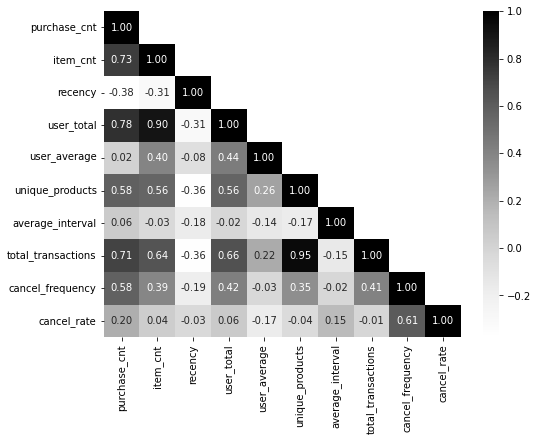

In [19]:
# 시각화 라이브러리 불러오기
import seaborn as sns  

# CustomerID는 제외(drop)하고 상관관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
# np.zeros_like(): 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask = np.zeros_like(corr)
# array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정
mask[np.triu_indices_from(mask, k=1)] = True

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()